# ***Business Understanding***

1. *We have to create a model which can predict whether sms is spam or not.*
2. *Model predict with high accuracy and precision.*

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

***Loading Dataset***

In [2]:
df = pd.read_csv("SMSSpamCollection", sep = "\t", names = ["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# ***Data Cleaning***

In [5]:
# Checking the missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
# Checking duplicates values
df.duplicated().sum()

403

In [7]:
# Dropping duplicates values
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(5169, 2)

In [10]:
# Replacing spam and ham with 1 and 0
df["label"].replace({"ham": 0, "spam": 1}, inplace = True)

# ***EDA***

In [11]:
df.sample(5)

,label,message
3023,0,How dare you change my ring
203,0,Your account has been refilled successfully by...
78,0,Does not operate after &lt;#&gt; or what
3089,0,"'Wnevr i wana fal in luv vth my books, My bed ..."
4127,1,"SPJanuary Male Sale! Hot Gay chat now cheaper,..."


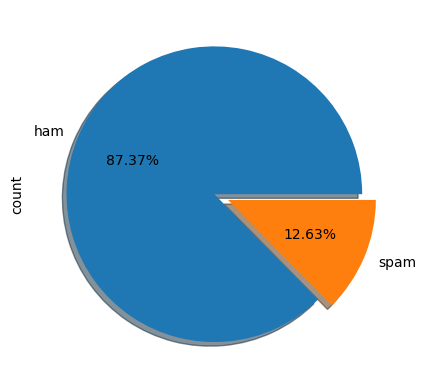

In [12]:
df["label"].value_counts().plot(kind = "pie", autopct = "%0.02f%%", shadow = True, explode = [0, 0.1], labels = ["ham", "spam"])
plt.show()

In [13]:
import nltk

In [14]:
# Counting the letter of each row in message variable
df["letter_count"] = df["message"].apply(len)

In [15]:
# Counting the word of each row in message variable
df["word_count"] = df["message"].apply(lambda x : len(nltk.word_tokenize(x)))

In [16]:
# Counting the sentence of each row in message variable
df["sent_count"] = df["message"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [17]:
df.head()

,label,message,letter_count,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
df[['word_count', 'letter_count', 'sent_count']].describe()

,word_count,letter_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,18.593538,79.344554,1.974076
std,13.402779,58.437457,1.458967
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,61.000000,1.000000
75%,26.000000,119.000000,2.000000
max,220.000000,910.000000,38.000000


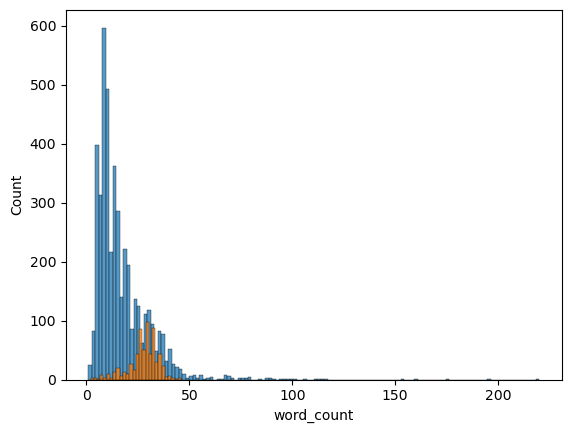

In [19]:
# Plotting the histogram for ham and spam in respect of word_count
sns.histplot(df[df["label"] == 0]["word_count"])
sns.histplot(df[df["label"] == 1]["word_count"])
plt.show()

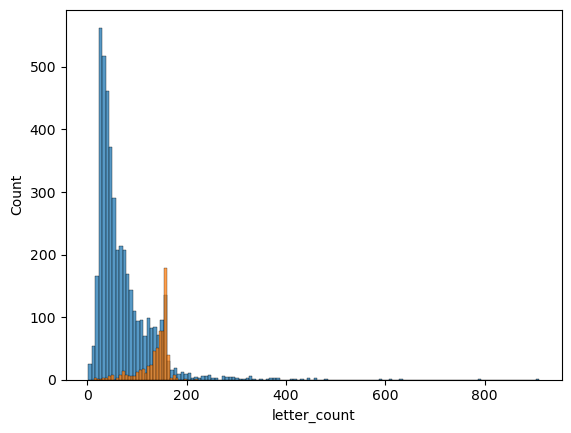

In [20]:
sns.histplot(df[df["label"] == 0]["letter_count"])
sns.histplot(df[df["label"] == 1]["letter_count"])
plt.show()

In [159]:
# Calcualting the correlation
corr = df[['letter_count', 'word_count', 'sent_count']].corr()

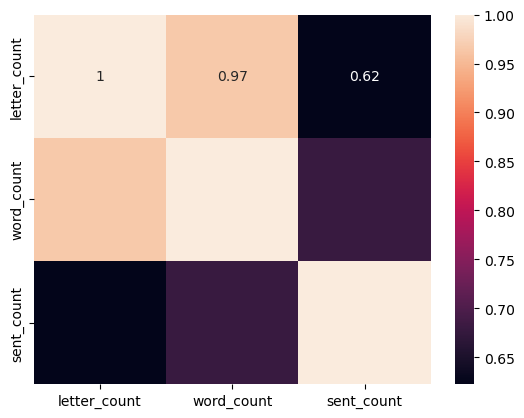

In [163]:
sns.heatmap(corr, annot = True)
plt.show()

# ***Data Preprocessing***

In [21]:
# Importing nltk libraries
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [22]:
df.reset_index(drop = True, inplace = True)

In [23]:
# Functions to clean the text and perform stemmimg
def clean_text(text):
    rf = re.sub("[^A-Za-z]", " ", text)
    rf = rf.lower()
    rf = rf.split()
    rf = [ps.stem(word) for word in rf if not word in set(stopwords.words("english"))]
    rf = " ".join(rf)
    return rf

In [24]:
df["trans_message"] = df["message"].apply(clean_text)

In [25]:
df.head()

,label,message,letter_count,word_count,sent_count,trans_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [26]:
# Importing wordcloud to see the common words in ham and spam
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")

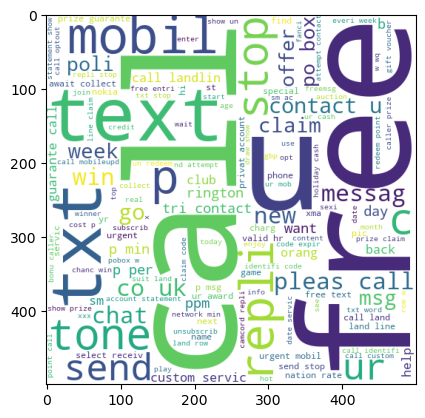

In [27]:
span_wc = wc.generate(df[df["label"] == 1]["trans_message"].str.cat(sep = " "))
plt.imshow(span_wc)
plt.show()

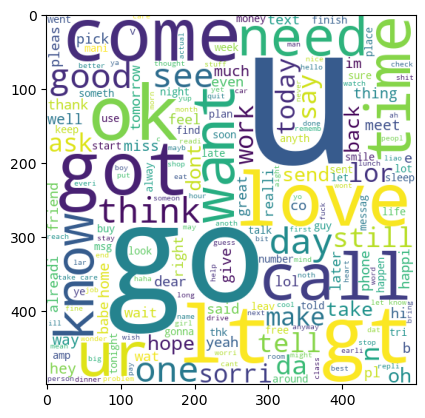

In [28]:
ham_wc = wc.generate(df[df["label"] == 0]["trans_message"].str.cat(sep = " "))
plt.imshow(span_wc)
plt.show()

In [29]:
# Fetching the highest 30 values for spam
corpus = []
for msg in df[df["label"] == 1]["trans_message"].to_list():
    for word in msg.split():
        corpus.append(word)

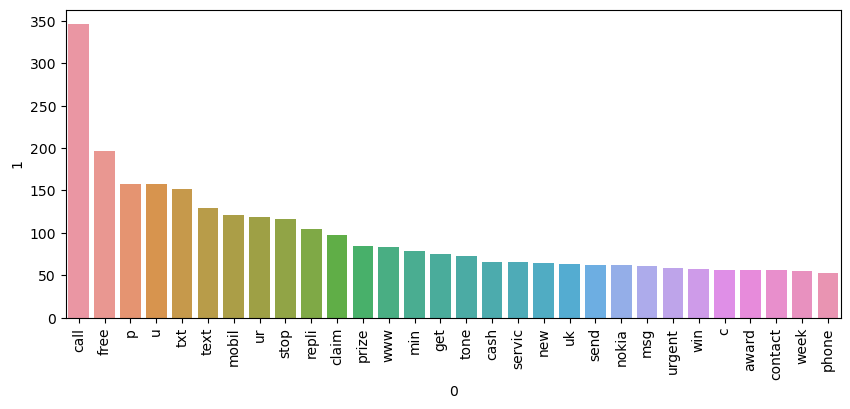

In [30]:
from collections import Counter
plt.figure(figsize = (10, 4))
sns.barplot(x = pd.DataFrame(Counter(corpus).most_common(30))[0],y = pd.DataFrame(Counter(corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

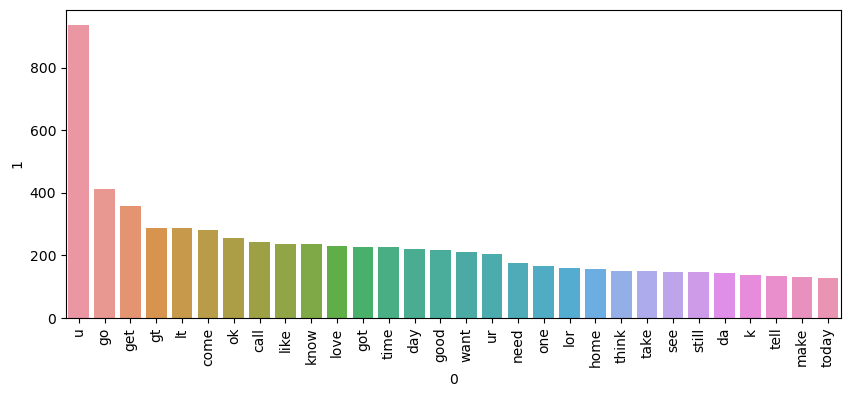

In [31]:
# Fetching the highest 30 values for ham
ham_corpus = []
for msg in df[df["label"] == 0]["trans_message"].to_list():
    for word in msg.split():
        ham_corpus.append(word)
        
plt.figure(figsize = (10, 4))
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

In [32]:
df.sample(5)

,label,message,letter_count,word_count,sent_count,trans_message
3231,1,Do you want a new Video phone? 600 anytime any...,157,29,2,want new video phone anytim network min inclus...
4982,0,I'm in inside office..still filling forms.don ...,70,15,1,insid offic still fill form know leav
4565,1,Want the latest Video handset? 750 anytime any...,132,24,4,want latest video handset anytim network min h...
4239,0,I wish things were different. I wonder when i ...,205,45,4,wish thing differ wonder abl show much valu pl...
4235,0,Understand. his loss is my gain :) so do you w...,58,16,3,understand loss gain work school


# ***Vectorization***

In [33]:
# Performing the count-vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df["trans_message"]).toarray()

In [34]:
y = df["label"]

***Train_Test_Split***

In [62]:
# Importing ml models and metrics for evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB 

In [37]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# ***GridSearchCV***

***SVC***

In [ ]:
estimator = SVC()

param_grid = {"C": [0.001, 0.1, 1, 10], "kernel": ["linear", "poly", "sigmoid", "rbf"]}

grid = GridSearchCV(estimator, param_grid, cv = 5, scoring = "accuracy")

grid.fit(X_train, y_train)

grid.best_params_

***KNeighborsClassifier***

In [77]:
estimator = KNeighborsClassifier()

param_grid = {"n_neighbors": list(range(1, 20))}

grid = GridSearchCV(estimator, param_grid, cv = 5, scoring = "accuracy")

grid.fit(X_train, y_train)

grid.best_params_

{'n_neighbors': 1}

***DecisionTreeClassifier***

In [79]:
estimator = DecisionTreeClassifier()

param_grid = {"max_depth": list(range(9, 15)), "criterion": ["gini"]}

grid = GridSearchCV(estimator, param_grid, cv = 5, scoring = "accuracy")

grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 13}

***RandomForestClassifier***

In [81]:
estimator = RandomForestClassifier()

param_grid = {"n_estimators": list(range(48, 52))}

grid = GridSearchCV(estimator, param_grid, cv = 5, scoring = "accuracy")

grid.fit(X_train, y_train)

grid.best_params_

{'n_estimators': 51}

***AdaBoostClassifier***

In [ ]:
estimator = AdaBoostClassifier()

param_grid = {"n_estimators": list(range(1, 20))}

grid = GridSearchCV(estimator, param_grid, cv = 5, scoring = "accuracy")

grid.fit(X_train, y_train)

grid.best_params_

***GradientBoostingClassifier***

In [ ]:
estimator = GradientBoostingClassifier()

param_grid = {"n_estimators": list(range(1, 20))}

grid = GridSearchCV(estimator, param_grid, cv = 5, scoring = "accuracy")

grid.fit(X_train, y_train)

grid.best_params_

***XGBClassifier***

In [ ]:
estimator = XGBClassifier()

param_grid = {"n_estimators": list(range(1, 10))}

grid = GridSearchCV(estimator, param_grid, cv = 5, scoring = "accuracy")

grid.fit(X_train, y_train)

grid.best_params_

***MultinomialNB***

In [101]:
estimator = MultinomialNB()

param_grid = {"alpha": [0.1, 1, 2, 3, 4, 5, 6]}

grid = GridSearchCV(estimator, param_grid, cv = 5, scoring = "accuracy")

grid.fit(X_train, y_train)

grid.best_params_

{'alpha': 2}

# ***Model***

***LogisticRegression***

In [83]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
pred_train = lr_model.predict(X_train)
pred_test = lr_model.predict(X_test)

print("Training Accuracy :", accuracy_score(y_train, pred_train))
print("Testing Accuracy :", accuracy_score(y_test, pred_test))

print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

print("Classification Report")
print(classification_report(y_test, pred_test))

Training Accuracy : 0.9968561064087061
Testing Accuracy : 0.97678916827853
Confusion Matrix
[[907   1]
 [ 23 103]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       908
           1       0.99      0.82      0.90       126

    accuracy                           0.98      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.98      0.98      0.98      1034



***SVC***

In [85]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
pred_train = svm_model.predict(X_train)
pred_test = svm_model.predict(X_test)

print("Training Accuracy :", accuracy_score(y_train, pred_train))
print("Testing Accuracy :", accuracy_score(y_test, pred_test))

print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

print("Classification Report")
print(classification_report(y_test, pred_test))

Training Accuracy : 0.9970979443772672
Testing Accuracy : 0.9690522243713733
Confusion Matrix
[[907   1]
 [ 31  95]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       908
           1       0.99      0.75      0.86       126

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034



***KNeighborsClassifier***

In [87]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, y_train)
pred_train = knn_model.predict(X_train)
pred_test = knn_model.predict(X_test)

print("Training Accuracy :", accuracy_score(y_train, pred_train))
print("Testing Accuracy :", accuracy_score(y_test, pred_test))

print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

print("Classification Report")
print(classification_report(y_test, pred_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9545454545454546
Confusion Matrix
[[908   0]
 [ 47  79]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       908
           1       1.00      0.63      0.77       126

    accuracy                           0.95      1034
   macro avg       0.98      0.81      0.87      1034
weighted avg       0.96      0.95      0.95      1034



***DecisionTreeClassifier***

In [89]:
dt_model = DecisionTreeClassifier(max_depth = 13, criterion = "gini")
dt_model.fit(X_train, y_train)
pred_train = dt_model.predict(X_train)
pred_test = dt_model.predict(X_test)

print("Training Accuracy :", accuracy_score(y_train, pred_train))
print("Testing Accuracy :", accuracy_score(y_test, pred_test))

print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

print("Classification Report")
print(classification_report(y_test, pred_test))

Training Accuracy : 0.9842805320435308
Testing Accuracy : 0.9613152804642167
Confusion Matrix
[[903   5]
 [ 35  91]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       908
           1       0.95      0.72      0.82       126

    accuracy                           0.96      1034
   macro avg       0.96      0.86      0.90      1034
weighted avg       0.96      0.96      0.96      1034



***RandomForestClassifier***

In [90]:
rf_model = RandomForestClassifier(n_estimators = 50)
rf_model.fit(X_train, y_train)
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

print("Training Accuracy :", accuracy_score(y_train, pred_train))
print("Testing Accuracy :", accuracy_score(y_test, pred_test))

print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

print("Classification Report")
print(classification_report(y_test, pred_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9690522243713733
Confusion Matrix
[[908   0]
 [ 32  94]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       908
           1       1.00      0.75      0.85       126

    accuracy                           0.97      1034
   macro avg       0.98      0.87      0.92      1034
weighted avg       0.97      0.97      0.97      1034



***AdaBoostClassifier***

In [91]:
ada_model = AdaBoostClassifier(n_estimators = 50)
ada_model.fit(X_train, y_train)
pred_train = ada_model.predict(X_train)
pred_test = ada_model.predict(X_test)

print("Training Accuracy :", accuracy_score(y_train, pred_train))
print("Testing Accuracy :", accuracy_score(y_test, pred_test))

print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

print("Classification Report")
print(classification_report(y_test, pred_test))

Training Accuracy : 0.9813784764207981
Testing Accuracy : 0.9700193423597679
Confusion Matrix
[[902   6]
 [ 25 101]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       908
           1       0.94      0.80      0.87       126

    accuracy                           0.97      1034
   macro avg       0.96      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



***GradientBoostingClassifier***

In [92]:
gr_model = GradientBoostingClassifier(n_estimators = 50)
gr_model.fit(X_train, y_train)
pred_train = gr_model.predict(X_train)
pred_test = gr_model.predict(X_test)

print("Training Accuracy :", accuracy_score(y_train, pred_train))
print("Testing Accuracy :", accuracy_score(y_test, pred_test))

print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

print("Classification Report")
print(classification_report(y_test, pred_test))

Training Accuracy : 0.969770253929867
Testing Accuracy : 0.9564796905222437
Confusion Matrix
[[907   1]
 [ 44  82]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       908
           1       0.99      0.65      0.78       126

    accuracy                           0.96      1034
   macro avg       0.97      0.82      0.88      1034
weighted avg       0.96      0.96      0.95      1034



***XGBClassifier***

In [94]:
xgb_model = XGBClassifier(n_estimators = 50)
xgb_model.fit(X_train, y_train)
pred_train = xgb_model.predict(X_train)
pred_test = xgb_model.predict(X_test)

print("Training Accuracy :", accuracy_score(y_train, pred_train))
print("Testing Accuracy :", accuracy_score(y_test, pred_test))

print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

print("Classification Report")
print(classification_report(y_test, pred_test))

Training Accuracy : 0.9881499395405079
Testing Accuracy : 0.9729206963249516
Confusion Matrix
[[907   1]
 [ 27  99]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       908
           1       0.99      0.79      0.88       126

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



***GaussianNB***

In [97]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred_train = gnb.predict(X_train)
pred_test = gnb.predict(X_test)

print("Training Accuracy :", accuracy_score(y_train, pred_train))
print("Testing Accuracy :", accuracy_score(y_test, pred_test))

print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

print("Classification Report")
print(classification_report(y_test, pred_test))

Training Accuracy : 0.9228536880290206
Testing Accuracy : 0.8626692456479691
Confusion Matrix
[[787 121]
 [ 21 105]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       908
           1       0.46      0.83      0.60       126

    accuracy                           0.86      1034
   macro avg       0.72      0.85      0.76      1034
weighted avg       0.91      0.86      0.88      1034



***MultinomialNB***

In [99]:
mnb = MultinomialNB(alpha = 2)
mnb.fit(X_train, y_train)
pred_train = mnb.predict(X_train)
pred_test = mnb.predict(X_test)

print("Training Accuracy :", accuracy_score(y_train, pred_train))
print("Testing Accuracy :", accuracy_score(y_test, pred_test))

print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

print("Classification Report")
print(classification_report(y_test, pred_test))

Training Accuracy : 0.9908101571946796
Testing Accuracy : 0.9787234042553191
Confusion Matrix
[[901   7]
 [ 15 111]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       908
           1       0.94      0.88      0.91       126

    accuracy                           0.98      1034
   macro avg       0.96      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



***BernoulliNB***

In [100]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
pred_train = bnb.predict(X_train)
pred_test = bnb.predict(X_test)

print("Training Accuracy :", accuracy_score(y_train, pred_train))
print("Testing Accuracy :", accuracy_score(y_test, pred_test))

print("Confusion Matrix")
print(confusion_matrix(y_test, pred_test))

print("Classification Report")
print(classification_report(y_test, pred_test))

Training Accuracy : 0.9833131801692866
Testing Accuracy : 0.9729206963249516
Confusion Matrix
[[902   6]
 [ 22 104]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       908
           1       0.95      0.83      0.88       126

    accuracy                           0.97      1034
   macro avg       0.96      0.91      0.93      1034
weighted avg       0.97      0.97      0.97      1034



# ***Saving the Model***

In [102]:
import pickle
pickle.dump(cv, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("mnb_model.pkl", "wb"))

# ***Predicting with new data***

In [153]:
data = "cash cash win"

In [155]:
def clean_text(text):
    rf = re.sub("[^A-Za-z]", " ", text)
    rf = rf.lower()
    rf = rf.split()
    rf = [ps.stem(word) for word in rf if not word in set(stopwords.words("english"))]
    rf = " ".join(rf)
    return rf

clean_data = clean_text(data)
vector = cv.transform([clean_data])
value = mnb.predict(vector)[0]
if value == 1:
    print("Spam")
else:
    print("Ham")

Spam
